# First steps with Gym

## Environment
### CartPole-v0

In [131]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample ()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

print ("State space dimension is:", env.observation_space.shape[0])
print ("State upper bounds:", env.observation_space.high)
print ("State lower bounds:", env.observation_space.low)
print ("Number of actions is:", env.action_space.n)

Episode finished after 18 timesteps
Episode finished after 23 timesteps
Episode finished after 18 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 18 timesteps
Episode finished after 15 timesteps
Episode finished after 18 timesteps
Episode finished after 40 timesteps
Episode finished after 17 timesteps
Episode finished after 49 timesteps
Episode finished after 14 timesteps
Episode finished after 19 timesteps
Episode finished after 21 timesteps
Episode finished after 18 timesteps
Episode finished after 27 timesteps
Episode finished after 23 timesteps
Episode finished after 17 timesteps
Episode finished after 18 timesteps
Episode finished after 47 timesteps
State space dimension is: 4
State upper bounds: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
State lower bounds: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Number of actions is: 2


### FrozenLake-v0

In [152]:
env = gym.make('FrozenLake-v0')

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [167]:
def chooseAction (q_table, state, epsilon = 0, softmax = True, tau = 0.01):
    if softmax:
        aux = np.exp(q_table[state]/tau)
        d = np.sum(aux)
        return np.random.choice (np.arange(env.action_space.n), p=aux / d)
    if np.random.random () > epsilon:
        return np.argmax(q_table[observation1])
    return env.action_space.sample()
        

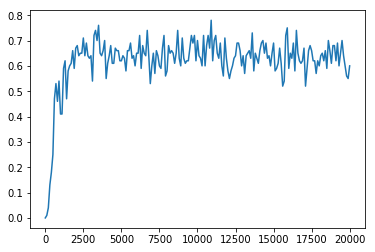

In [168]:
def SARSA(nEpisode = 20000, gamma = 0.99, alpha = 0.4, epsilon0 = 0.9, epsilonMin = 0.05, decreaseRate = True, softmax = True, tau = 0.01, window = 100):
    accuracy = 0
    epsilon = epsilon0
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    result = np.zeros (window)
    histAcc = [0]
    episode = 0
    
    for _ in range(nEpisode):
        t = 0
        epsilon = max(epsilonMin, 0.999 * epsilon) if decreaseRate else epsilon
        observation0 = env.reset()
        action0 = env.action_space.sample ()
        done  = False
        while not done and t < 200:
            observation1, reward, done, info = env.step(action0)
            action1 = chooseAction(q_table, observation1, epsilon, softmax, tau)
            error = reward + gamma * q_table[observation1, action1] - q_table[observation0, action0]
            q_table[observation0, action0] += alpha * error
            observation0, action0 = observation1, action1
            t += 1

        success = 1 if (reward == 1) else 0
        accuracy += (success - result[episode]) / window
        result[episode] = success
        episode = (episode + 1) % window
        if episode == 0:
            histAcc.append(accuracy)

    plt.plot(100 * np.arange(len(histAcc)), histAcc)
    return q_table, histAcc
        
q_table, histAcc = SARSA (20000, softmax = True)

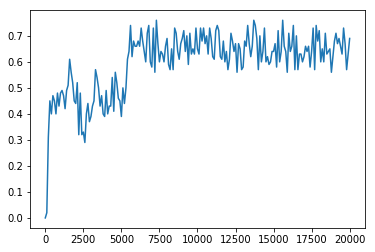

In [174]:
def QLearning(nEpisode = 20000, gamma = 0.99, alpha = 0.4, epsilon0 = 0.9, epsilonMin = 0.05, decreaseRate = True, softmax = True, tau = 0.01, window = 100):
    accuracy = 0
    epsilon = epsilon0
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    result = np.zeros (window)
    histAcc = [0]
    episode = 0
    
    for _ in range(nEpisode):
        t = 0
        epsilon = max(epsilonMin, 0.999 * epsilon) if decreaseRate else epsilon
        observation0 = env.reset()
        action0 = env.action_space.sample ()
        done  = False
        while not done and t < 200:
            observation1, reward, done, info = env.step(action0)
            action1 = chooseAction(q_table, observation1, epsilon, softmax, tau)
            error = reward + gamma * q_table[observation1, np.argmax(q_table[observation1])] - q_table[observation0, action0]
            q_table[observation0, action0] += alpha * error
            observation0, action0 = observation1, action1
            t += 1

        success = 1 if (reward == 1) else 0
        accuracy += (success - result[episode]) / window
        result[episode] = success
        episode = (episode + 1) % window
        if episode == 0:
            histAcc.append(accuracy)

    plt.plot(100 * np.arange(len(histAcc)), histAcc)
    return q_table, histAcc

q_table, histAcc = QLearning (20000, softmax = True)

In [175]:
def testPolicy (q_table, nEpisode = 10000):
    success = 0
    for _ in range(nEpisode):
        t = 0
        observation = env.reset()
        action = np.argmax(q_table[observation])
        done  = False
        while not done and t < 200:
            observation, reward, done, info = env.step(action)
            action = np.argmax(q_table[observation])
            t += 1

        if reward == 1:
            success += 1
    return success / nEpisode

testPolicy(q_table)    

0.7353